In [34]:
#https://www.kaggle.com/c/dogs-vs-cats/data
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-01-17 14:00:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   213MB/s    in 0.3s    

2022-01-17 14:00:20 (213 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [6]:
#unzip the packages

import zipfile

zip = zipfile.ZipFile("./cats_and_dogs_filtered.zip")
zip.extractall("./cats_and_dogs_filtered")
zip.close()

In [7]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras 

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1/255)

train_gen = train_data.flow_from_directory(
    "./cats_and_dogs_filtered/cats_and_dogs_filtered/train",
    target_size=(150,150),
    batch_size = 20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.


In [11]:
validation_data = ImageDataGenerator(rescale=1/255)

validation_gen = train_data.flow_from_directory(
    "./cats_and_dogs_filtered/cats_and_dogs_filtered/validation",
    target_size=(150,150),
    batch_size = 20,
    class_mode="binary"
)

Found 1000 images belonging to 2 classes.


In [12]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation="relu"),
                tf.keras.layers.Dense(1, activation="sigmoid")

                                    
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [18]:
from tensorflow.keras.optimizers import RMSprop 
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

In [22]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=100,
    epochs=20,
    validation_data = validation_gen,
    validation_steps=50,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
100/100 - 10s - loss: 0.0438 - accuracy: 0.9905 - val_loss: 1.9763 - val_accuracy: 0.7220 - 10s/epoch - 104ms/step
Epoch 2/20
100/100 - 10s - loss: 0.0556 - accuracy: 0.9920 - val_loss: 2.3510 - val_accuracy: 0.7260 - 10s/epoch - 102ms/step
Epoch 3/20
100/100 - 10s - loss: 0.0590 - accuracy: 0.9910 - val_loss: 2.3148 - val_accuracy: 0.7250 - 10s/epoch - 97ms/step
Epoch 4/20
100/100 - 10s - loss: 0.0322 - accuracy: 0.9920 - val_loss: 2.7161 - val_accuracy: 0.7380 - 10s/epoch - 95ms/step
Epoch 5/20
100/100 - 10s - loss: 0.0334 - accuracy: 0.9925 - val_loss: 2.3575 - val_accuracy: 0.7290 - 10s/epoch - 96ms/step
Epoch 6/20
100/100 - 10s - loss: 0.0482 - accuracy: 0.9925 - val_loss: 2.4650 - val_accuracy: 0.7250 - 10s/epoch - 98ms/step
Epoch 7/20
100/100 - 10s - loss: 0.0693 - accuracy: 0.9900 - val_loss: 2.2949 - val_accuracy: 0.7220 - 10s/epoch - 96ms/step
Epoch 8/20
100/100 - 10s - loss: 0.0265 - accuracy: 0.9925 - val_loss: 2.9105 - val_accuracy: 0.7310 - 10s/epoch - 100ms/st

Saving 6.jpg to 6.jpg
[1.]
6.jpg -This is a DOG


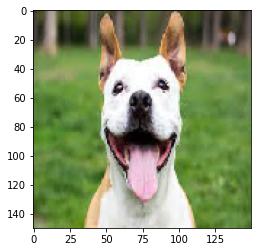

In [33]:
from google.colab import files 
from keras.preprocessing import image 
import matplotlib.pyplot as plt

upload = files.upload()

for fn in upload.keys():
  path = "/content/"+fn 
  img = image.load_img(path, target_size=(150,150))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=5)
  print(classes[0])

  if classes[0] > 0.5:
    
    print(fn+" -This is a DOG")
  else:
    
    print(fn+"-This is a CAT")